In [1]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fox_vs_nettekoven/corbetta_cerebellum_stroke_fluency'

# 01 - Begin Analysis

Enter the path to the dictionary generated by Notebook 01

In [2]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/results/fox_vs_nettekoven/corbetta_cerebellum_stroke_fluency/tmp/dataset_dict.json'

What correlation method would you like to use?
- Pearson is very fast, but depends on linearity and is sensitive to outliers
- Spearman is slower, but much more robust

In [3]:
correlation = 'spearman'

In [4]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
from calvin_utils.ccm_utils.stat_utils import CorrelationCalculator
data_loader = DataLoader(dict_path)
correlation_calculator = CorrelationCalculator(method=correlation, verbose=False)
corr_map_dict = correlation_calculator.generate_correlation_maps(data_loader)

Evaluating Corbetta Stroke Cerebellum
Initializaing ranked data for: Corbetta Stroke Cerebellum


# 02 - Compare How 2 Different Maps Relate to Your Outcome
- Enter paths to ROIs you want to test. Will see if one better predicts outcomes than the other
- Only run one dataset at a time. 

In [26]:
map_one= '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/mikes_maps/verbal_fluency_fc-T_map.nii.gz'
map_two = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/raynor_network_mapping/data/nettekoven_maps/conn/sub-resampleducerebellumuroiu1h4utou17h20ubilateral_space-2mm_lesionMask_T.nii.gz'

In [27]:
from calvin_utils.ccm_utils.convergent_loocv import LOOCVAnalyzer
loocv_analyzer = LOOCVAnalyzer(corr_map_dict, data_loader, 
                               similarity='spatial_correl',
                               method=correlation,
                               out_dir=out_dir,
                               mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii',
                               roi_path=None,
                               )

Removing NaNS from self.coor_map_dict.


In [28]:
loocv_analyzer.compare_roi_correlations(roi1=map_one, roi2=map_two, method='bootstrap', n_iter=1000, seed=42, delta_r2=True)

100%|██████████| 1000/1000 [02:20<00:00,  7.13it/s]

Below results used delta explained variance (r-squared): True
Checking the probability that ROI 1 outperforms ROI 2 by comparing # of times it outperformed it in
Corbetta Stroke Cerebellum 
    -Avg delta value: 0.020930786902229728| Probability Roi 1 is generally superior: 0.563.
Overall bootstrap:
    avg delta R = 0.0209, Probability ROI 1 is generally superior = 0.5630


Visualize the Differences

The differences are typically stored in:
- roi1 : BootstrapVisualizer.r_values['roi1]
- roi2 : BootstrapVisualizer.r_values['roi2]

Confidence Interval Method: Empiric Percentile


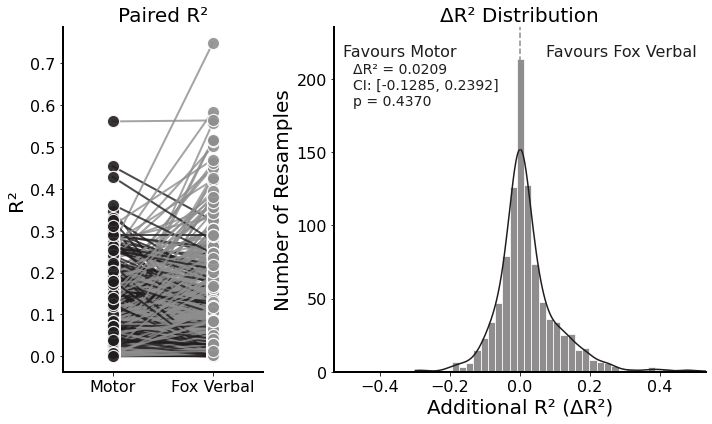

In [29]:
import numpy as np
from calvin_utils.ccm_utils.resampling_plot import ResampleVisualizer
visualizer = ResampleVisualizer(
    stat_array_1=np.array(loocv_analyzer.r_values['roi1']),
    stat_array_2=np.array(loocv_analyzer.r_values['roi2']),
    model1_name="Fox Verbal",
    model2_name="Motor",
    out_dir=out_dir+"/fox_v_motor"
)
visualizer.draw()

That's all

-Calvin